<a href="https://colab.research.google.com/github/didhitidasgupta/Microsoft-Project/blob/main/Predicting%20Enzyme%20Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
from google.colab import files
uploaded = files.upload()

Saving enzyme activity.csv to enzyme activity (4).csv


In [14]:
df = pd.read_csv("enzyme activity (4).csv", encoding='ISO-8859-1')
df.head()

,Isolate,Temperature (øC),pH,Starch Concentration (g/L),Enzyme Activity (U/mL)
0,1A,35,6,15,4.105
1,2C,50,6,15,3.962
2,1B,50,6,15,3.820
3,3A,50,6,15,3.705
4,4B,35,6,15,3.621


In [15]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Isolate                     8 non-null      object 
 1   Temperature (øC)            8 non-null      int64  
 2   pH                          8 non-null      int64  
 3   Starch Concentration (g/L)  8 non-null      int64  
 4   Enzyme Activity (U/mL)      8 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 452.0+ bytes


,0
Isolate,0
Temperature (øC),0
pH,0
Starch Concentration (g/L),0
Enzyme Activity (U/mL),0


In [16]:
df.columns = ['Isolate', 'Temperature', 'pH', 'Starch_Concentration', 'Enzyme_Activity']

# Convert categorical 'Isolate' into numbers
df['Isolate'] = df['Isolate'].astype('category').cat.codes

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Isolate               8 non-null      int8   
 1   Temperature           8 non-null      int64  
 2   pH                    8 non-null      int64  
 3   Starch_Concentration  8 non-null      int64  
 4   Enzyme_Activity       8 non-null      float64
dtypes: float64(1), int64(3), int8(1)
memory usage: 396.0 bytes


,Isolate,Temperature,pH,Starch_Concentration,Enzyme_Activity
count,8.00000,8.000000,8.00000,8.0,8.000000
mean,3.50000,44.375000,6.25000,15.0,3.637875
std,2.44949,7.763238,0.46291,0.0,0.334548
min,0.00000,35.000000,6.00000,15.0,3.105000
25%,1.75000,35.000000,6.00000,15.0,3.439750
50%,3.50000,50.000000,6.00000,15.0,3.663000
75%,5.25000,50.000000,6.25000,15.0,3.855500
max,7.00000,50.000000,7.00000,15.0,4.105000


In [17]:
X = df[['Temperature', 'pH', 'Starch_Concentration', 'Isolate']]
y = df['Enzyme_Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.0943849444444445
R² Score: -0.6733064943059406


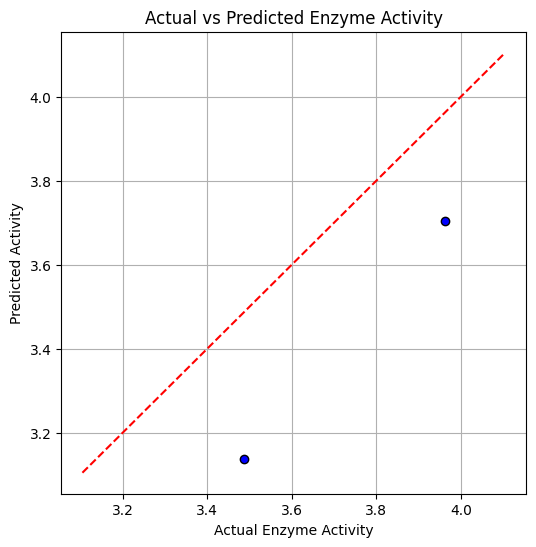

In [19]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize prediction accuracy
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.xlabel("Actual Enzyme Activity")
plt.ylabel("Predicted Activity")
plt.title("Actual vs Predicted Enzyme Activity")
plt.grid()
plt.show()


In [20]:
import joblib
joblib.dump(model, 'enzyme_activity_model.pkl')


['enzyme_activity_model.pkl']